In [12]:
import os
from keras.preprocessing.image import ImageDataGenerator

# 기본 데이터 경로 설정
base_dir = '/Users/kimsolbi/Desktop/AIP/hw6/hw6_dataset'

# 훈련 데이터셋에 대한 데이터 증강 및 이미지 데이터 제너레이터 인스턴스화
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20%를 검증 데이터셋으로 설정
)

# 검증 데이터셋에 대한 이미지 데이터 제너레이터 (증강 적용 X)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# 훈련 데이터셋 제너레이터 생성
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 검증 데이터셋 제너레이터 생성
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# train_generator의 class_indices 속성을 통해 생성된 라벨 확인
print(train_generator.class_indices)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import scipy
from keras.callbacks import EarlyStopping
import numpy as np


# 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # 클래스 수에 맞는 출력 유닛
])

# Early-Stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 검증 데이터셋에 대한 적절한 validation_steps 계산
validation_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 훈련 데이터에 대한 steps_per_epoch를 설정
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_steps,  # 계산된 validation_steps 사용
    callbacks=[early_stopping]  
)



# 모델 평가
val_loss, val_accuracy = model.evaluate(validation_generator)

print('Validation accuracy:', val_accuracy)

Epoch 1/20
100/100 [==============================] - 52s 514ms/step - loss: 1.3579 - accuracy: 0.3919 - val_loss: 1.2322 - val_accuracy: 0.4430
Epoch 2/20
100/100 [==============================] - 53s 525ms/step - loss: 1.0943 - accuracy: 0.5611 - val_loss: 1.1311 - val_accuracy: 0.5430
Epoch 3/20
100/100 [==============================] - 55s 554ms/step - loss: 0.9909 - accuracy: 0.5983 - val_loss: 0.9984 - val_accuracy: 0.6012
Epoch 4/20
100/100 [==============================] - 61s 610ms/step - loss: 0.9548 - accuracy: 0.6276 - val_loss: 0.8706 - val_accuracy: 0.6465
Epoch 5/20
100/100 [==============================] - 54s 539ms/step - loss: 0.8732 - accuracy: 0.6647 - val_loss: 0.8832 - val_accuracy: 0.6500
Epoch 6/20
100/100 [==============================] - 55s 545ms/step - loss: 0.9164 - accuracy: 0.6352 - val_loss: 1.0164 - val_accuracy: 0.5814
Epoch 7/20
100/100 [==============================] - 53s 530ms/step - loss: 0.8627 - accuracy: 0.6617 - val_loss: 0.8143 - val_ac

In [19]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [20]:
# 훈련 정확도와 검증 정확도 데이터 확인
print("Training Accuracy: \n", history.history['accuracy'])
print("\nValidation Accuracy: \n", history.history['val_accuracy'])

# 훈련 손실과 검증 손실 데이터 확인
print("\nTraining Loss: \n", history.history['loss'])
print("\nValidation Loss: \n", history.history['val_loss'])


Training Accuracy: 
 [0.391921728849411, 0.5610602498054504, 0.5982959866523743, 0.627642810344696, 0.6646875143051147, 0.6352161765098572, 0.6617229580879211, 0.6863363981246948, 0.6918749809265137, 0.7008519768714905, 0.6390028595924377, 0.6670874357223511, 0.6607762575149536, 0.6920164227485657, 0.7118964791297913, 0.7090564966201782, 0.7137898206710815, 0.7309374809265137, 0.7390344142913818, 0.7324076890945435]

Validation Accuracy: 
 [0.4430232644081116, 0.5430232286453247, 0.6011627912521362, 0.6465116143226624, 0.6499999761581421, 0.5813953280448914, 0.6941860318183899, 0.6744186282157898, 0.699999988079071, 0.7058139443397522, 0.6465116143226624, 0.6383720636367798, 0.6976743936538696, 0.6930232644081116, 0.7302325367927551, 0.7151162624359131, 0.699999988079071, 0.7418604493141174, 0.7441860437393188, 0.7430232763290405]

Training Loss: 
 [1.3578702211380005, 1.0943421125411987, 0.9908693432807922, 0.9547879099845886, 0.8731850981712341, 0.9163841605186462, 0.8626765012741089

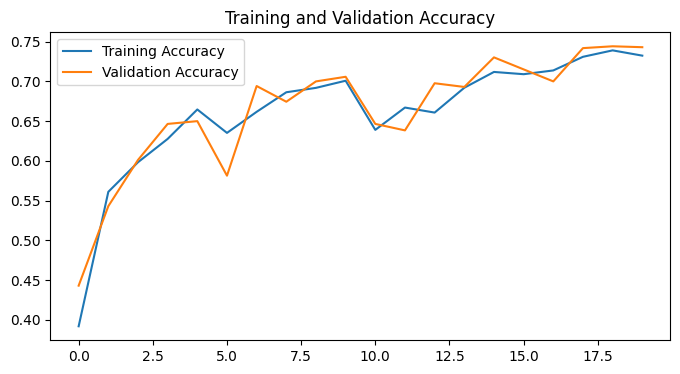

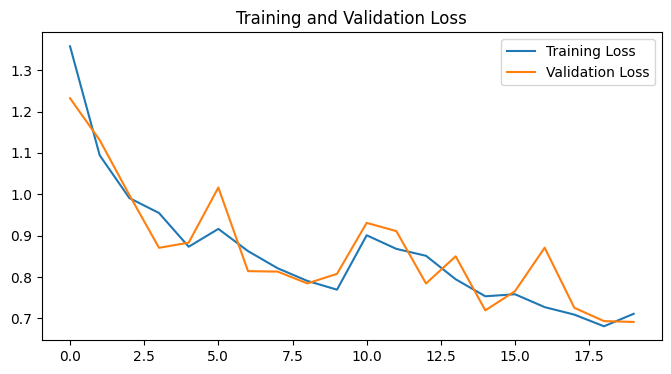

In [21]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 훈련 및 검증 손실 시각화
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


27/27 [==============================] - 5s 172ms/step


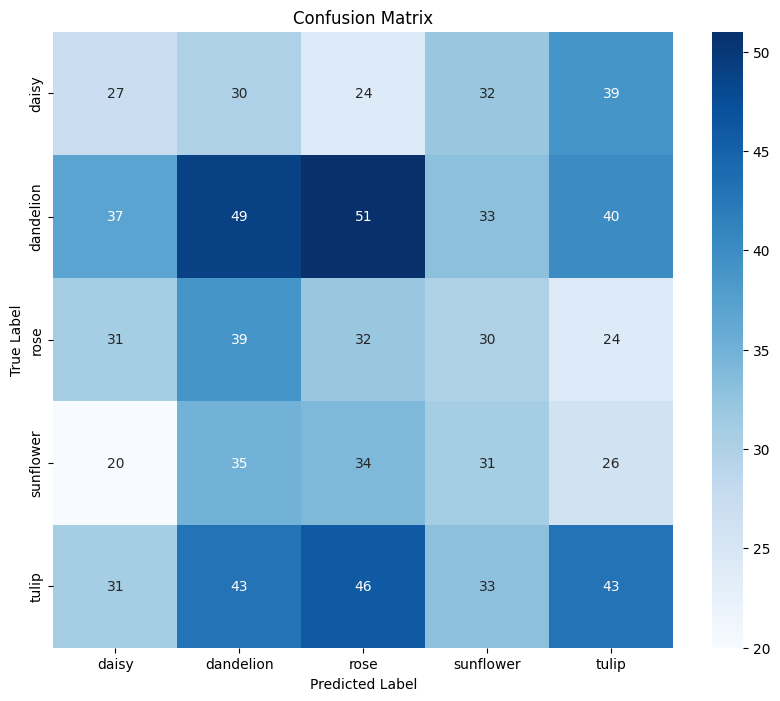

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 테스트 데이터셋에 대한 모델 예측
test_generator = validation_generator
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size))

# 예측 라벨을 실제 라벨과 비교하기 위해 가장 높은 확률의 인덱스를 선택
predicted_classes = np.argmax(predictions, axis=1)

# 실제 라벨
true_classes = test_generator.classes

# Confusion Matrix 생성
cm = confusion_matrix(true_classes, predicted_classes)

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
# 혼동 행렬에 사용할 라벨 이름들을 가져옵니다.
labels = list(train_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
